In [7]:
# example of a cnn for image classification
from numpy import asarray
from numpy import unique
from numpy import argmax
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

# you can also combine the imports
# e.g. from tensorflow.keras.layers import Conv2D, Flatten, MaxPool2d ....

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


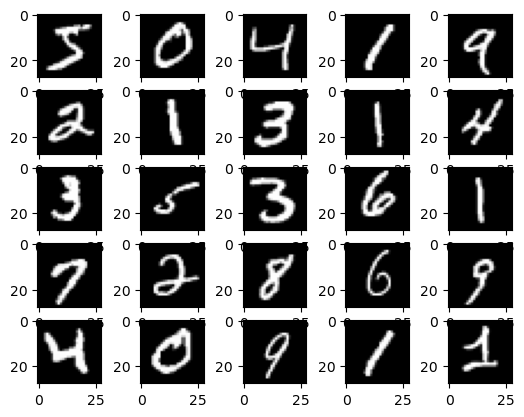

In [8]:
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(25):
 # define subplot
 pyplot.subplot(5, 5, i+1)
 # plot raw pixel data
 pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [9]:
# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# reshape data to have a single channel
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
# determine the shape of the input images
in_shape = x_train.shape[1:]

In [10]:
# determine the number of classes
n_classes = len(unique(y_train))
print(in_shape, n_classes)

(28, 28, 1) 10


In [11]:
# normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [12]:
# define model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

In [13]:
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=0)

In [15]:
# evaluate the model
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)
# make a prediction
for i in range(10):
    image = x_train[0]
    yhat = model.predict(asarray([image]))
    print('Predicted: class=%d' % argmax(yhat))

Accuracy: 0.986
1/1 [==============================] - 0s 61ms/step
Predicted: class=5
1/1 [==============================] - 0s 19ms/step
Predicted: class=5
1/1 [==============================] - 0s 19ms/step
Predicted: class=5
1/1 [==============================] - 0s 18ms/step
Predicted: class=5
1/1 [==============================] - 0s 18ms/step
Predicted: class=5
1/1 [==============================] - 0s 20ms/step
Predicted: class=5
1/1 [==============================] - 0s 18ms/step
Predicted: class=5
1/1 [==============================] - 0s 18ms/step
Predicted: class=5
1/1 [==============================] - 0s 18ms/step
Predicted: class=5
1/1 [==============================] - 0s 19ms/step
Predicted: class=5


In [16]:
for i in range(10):
    image = x_train[i]
    label = y_train[i]
    yhat = model.predict(asarray([image]))
    print(f'Predicted: class={argmax(yhat)}, the actual label was: {label}' )

1/1 [==============================] - 0s 19ms/step
Predicted: class=5, the actual label was: 5
1/1 [==============================] - 0s 20ms/step
Predicted: class=0, the actual label was: 0
1/1 [==============================] - 0s 21ms/step
Predicted: class=4, the actual label was: 4
1/1 [==============================] - 0s 20ms/step
Predicted: class=1, the actual label was: 1
1/1 [==============================] - 0s 19ms/step
Predicted: class=9, the actual label was: 9
1/1 [==============================] - 0s 21ms/step
Predicted: class=2, the actual label was: 2
1/1 [==============================] - 0s 19ms/step
Predicted: class=1, the actual label was: 1
1/1 [==============================] - 0s 19ms/step
Predicted: class=3, the actual label was: 3
1/1 [==============================] - 0s 18ms/step
Predicted: class=1, the actual label was: 1
1/1 [==============================] - 0s 18ms/step
Predicted: class=4, the actual label was: 4


In [17]:
import tensorflow as tf

In [18]:
from tensorflow.keras.datasets import cifar10

In [19]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 43s 0us/step


In [ ]:
#(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

169001437/169001437 [==============================] - 77s 0us/step


In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'

('airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck')

In [ ]:
image.shape

(32, 32, 3)

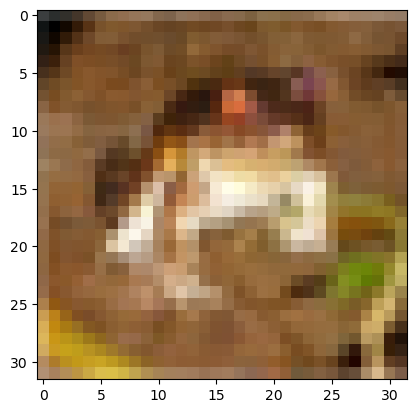

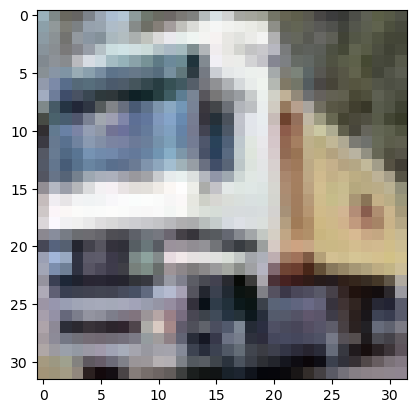

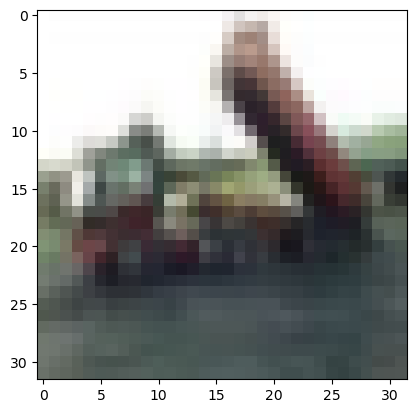

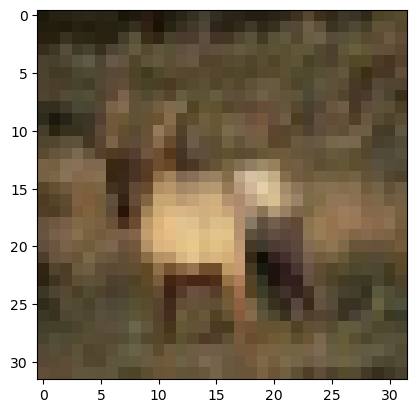

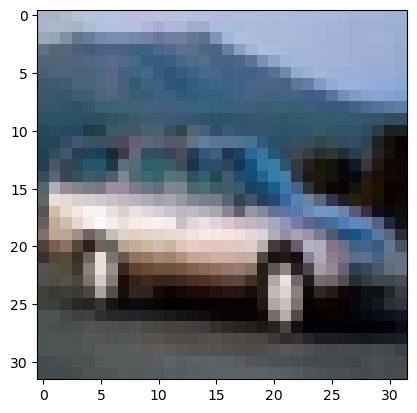

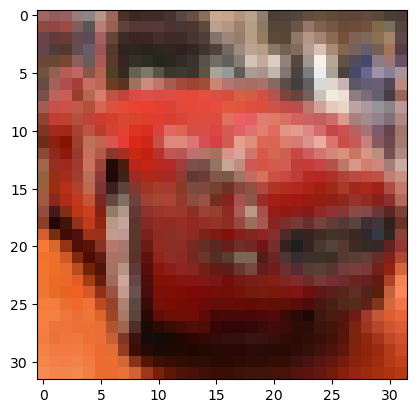

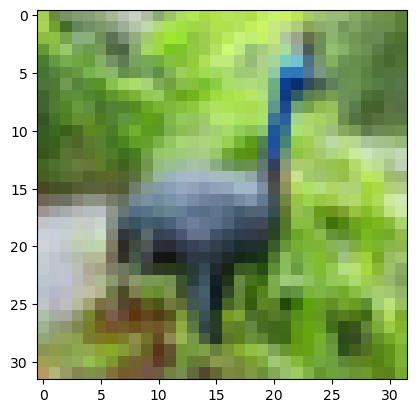

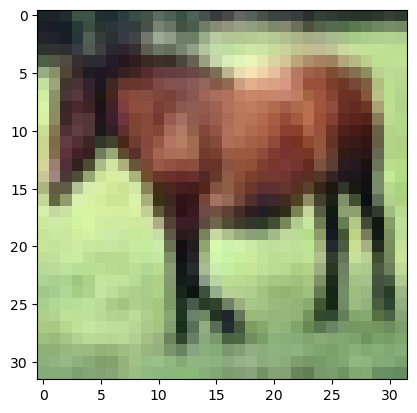

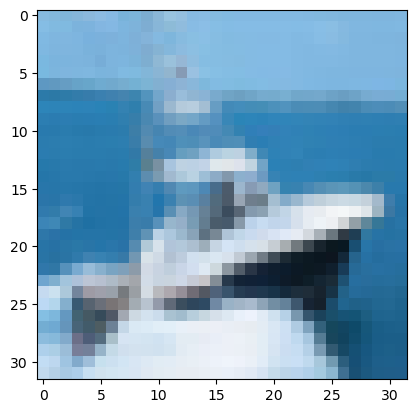

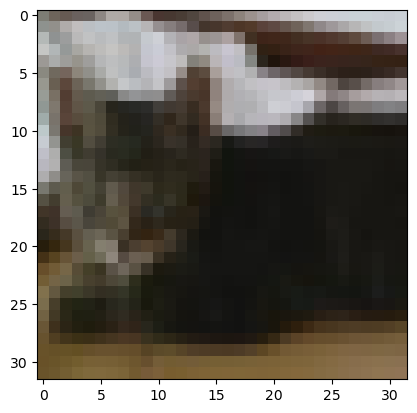

(32, 32, 3)


In [24]:
import matplotlib.pyplot as plt
for i in range(10):
    image = X_train[i]
    plt.imshow(image)
    plt.show()

print(image.shape)

In [20]:
# normalise the data
X_train = X_train / 255
X_test = X_test / 255

In [22]:
model = tf.keras.Sequential(
    [
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation="relu",input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(16, (3,3), padding='same', activation="relu"),
    tf.keras.layers.AveragePooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
]
)

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 16)          9232      
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 16)        

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [ ]:
# model = tf.keras.Sequential(
#     [
#     tf.keras.layers.Conv2D(32, (3,3), padding='same', activation="relu",input_shape=(32, 32, 3)),
#     tf.keras.layers.MaxPooling2D((2, 2), strides=2),

#     tf.keras.layers.Conv2D(64, (3,3), padding='same', activation="relu"),
#     tf.keras.layers.MaxPooling2D((2, 2), strides=2),

#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(100, activation="relu"),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(10, activation="softmax")
# ]
# )

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks = [
             EarlyStopping(patience=2)
]

In [27]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='loss',
    mode='min',
    save_best_only=True)

In [28]:
callbacks = [
             EarlyStopping(patience=2),
            #  model_checkpoint_callback,
]

In [29]:
# another_saved_model = tf.keras.models.load_model(checkpoint_filepath)

In [30]:
history = model.fit(X_train,y_train, epochs=600, validation_data=(X_test,y_test), callbacks=callbacks)

Epoch 1/600


/Users/samuelspeller/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 24s 15ms/step - loss: 1.5285 - accuracy: 0.4469 - val_loss: 1.3398 - val_accuracy: 0.5268
Epoch 2/600
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1779 - accuracy: 0.5812 - val_loss: 1.1055 - val_accuracy: 0.5956
Epoch 3/600
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0284 - accuracy: 0.6367 - val_loss: 0.9819 - val_accuracy: 0.6605
Epoch 4/600
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9414 - accuracy: 0.6686 - val_loss: 0.9416 - val_accuracy: 0.6668
Epoch 5/600
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8723 - accuracy: 0.6953 - val_loss: 0.8811 - val_accuracy: 0.6974
Epoch 6/600
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8131 - accuracy: 0.7153 - val_loss: 0.8634 - val_accuracy: 0.7024
Epoch 7/600
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7724 - accuracy: 0.7293 - val_loss: 0.8367 - val_

In [ ]:
import pandas as pd
metrics_df = pd.DataFrame(history.history)

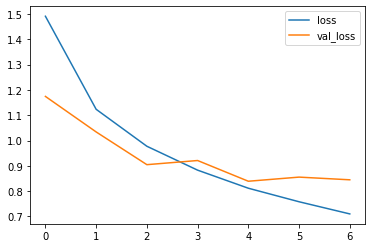

In [ ]:
metrics_df[["loss","val_loss"]].plot();

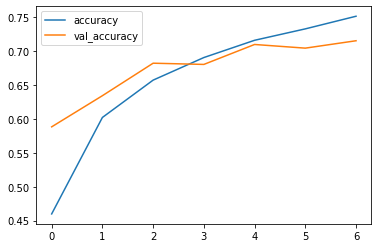

In [ ]:
metrics_df[["accuracy","val_accuracy"]].plot();

In [ ]:
model.save("model.h5")

In [ ]:
import tensorflow as tf

In [ ]:
load_saved_model = tf.keras.models.load_model("model.h5")
load_saved_model.summary()

Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 4096)              0         
                                      

2023-02-16 11:21:55.989612: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-16 11:21:55.989783: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [ ]:
for i in range(10):
    image = X_train[i]
    label = y_train[i]
    yhat = load_saved_model.predict(asarray([image]))
    print(f'Predicted: class={argmax(yhat)}, the actual label was: {label}' )

2023-02-16 11:23:28.887984: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-16 11:23:28.927453: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 278ms/step
Predicted: class=6, the actual label was: [6]
1/1 [==============================] - 0s 11ms/step
Predicted: class=9, the actual label was: [9]
1/1 [==============================] - 0s 11ms/step
Predicted: class=7, the actual label was: [9]
1/1 [==============================] - 0s 14ms/step
Predicted: class=0, the actual label was: [4]
1/1 [==============================] - 0s 11ms/step
Predicted: class=9, the actual label was: [1]
1/1 [==============================] - 0s 11ms/step
Predicted: class=1, the actual label was: [1]
1/1 [==============================] - 0s 12ms/step
Predicted: class=2, the actual label was: [2]
1/1 [==============================] - 0s 12ms/step
Predicted: class=7, the actual label was: [7]
1/1 [==============================] - 0s 11ms/step
Predicted: class=0, the actual label was: [8]
1/1 [==============================] - 0s 11ms/step
Predicted: class=9, the actual label was: [3]


In [35]:
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn import metrics


In [37]:
# can also use a confusion matrix to test the model. could implement it here.
# this is not working yet


y_hat = []

for i in range(len(y_hat)):
    y_hat.append(argmax(y_hat[i]))

cm = metrics.confusion_matrix(y_train, y_hat)

ValueError: Found input variables with inconsistent numbers of samples: [50000, 0]

In [ ]:
import seaborn as sns

sns.heatmap(cm, annot=True)

